In [79]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df_08=pd.read_csv('clean_08.csv')
df_18=pd.read_csv('clean_18.csv')
print('doneeee')

doneeee


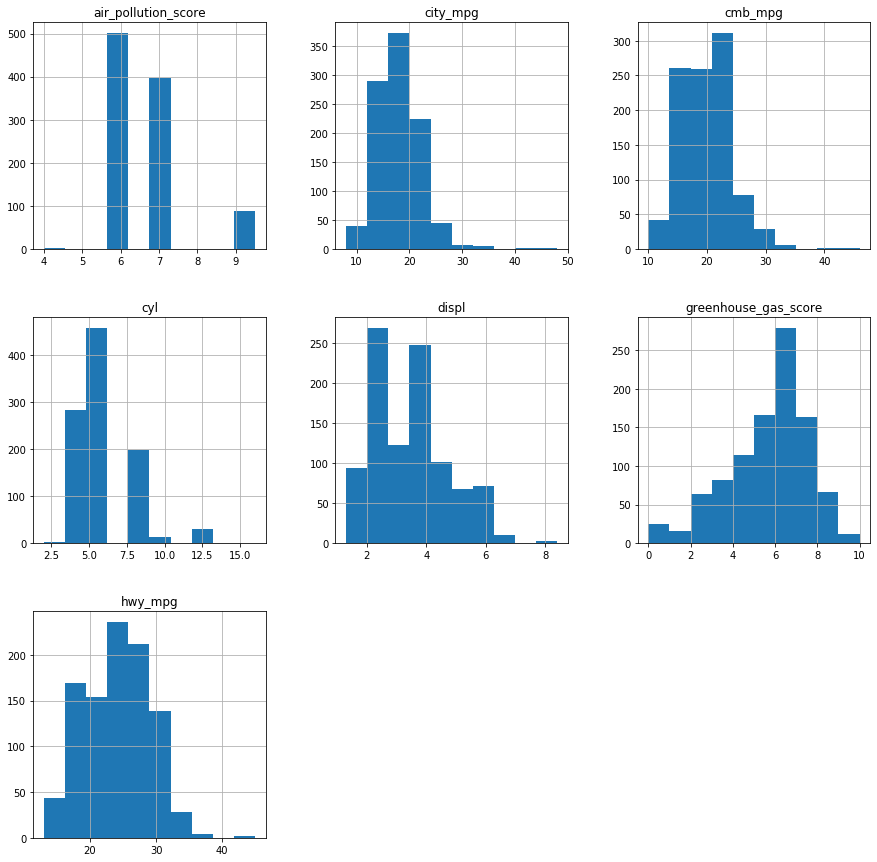

In [8]:
df_08.hist(figsize=(15,15));

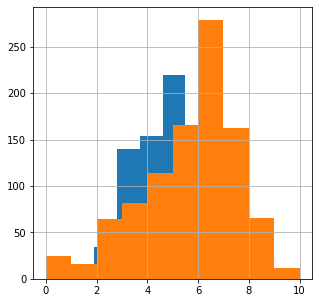

In [36]:
df_18.greenhouse_gas_score.hist(figsize=(5,5));
df_08.greenhouse_gas_score.hist(figsize=(5,5));

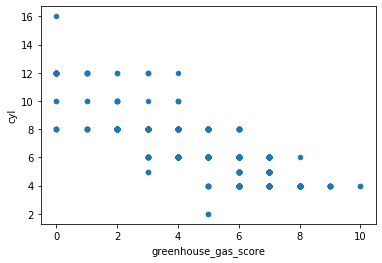

In [22]:
df_08.plot(x='greenhouse_gas_score',y='cyl',kind='scatter')

In [43]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


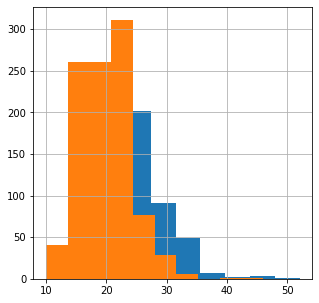

In [44]:
df_18.cmb_mpg.hist(figsize=(5,5));
df_08.cmb_mpg.hist(figsize=(5,5));

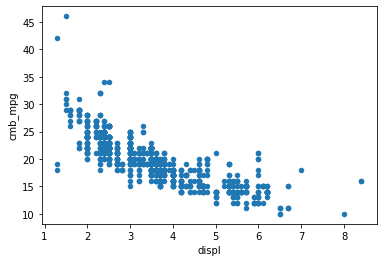

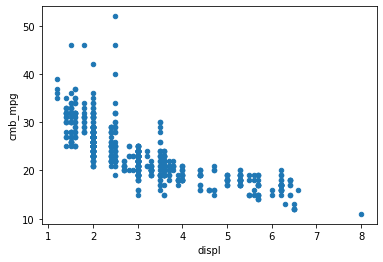

In [47]:

df_08.plot(x='displ',y='cmb_mpg',kind='scatter');
df_18.plot(x='displ',y='cmb_mpg',kind='scatter');

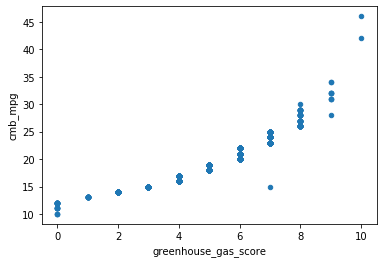

In [50]:

df_08.plot(x='greenhouse_gas_score',y='cmb_mpg',kind='scatter');

In [64]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [65]:
df_18.fuel.value_counts()

Gasoline    737
Diesel       19
gas           1
ethanol       1
Name: fuel, dtype: int64

In [71]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [83]:
alt_18 = df_18.query('fuel in ["Diesel", "ethanol"]').model.nunique()
alt_18

12

<BarContainer object of 2 artists>

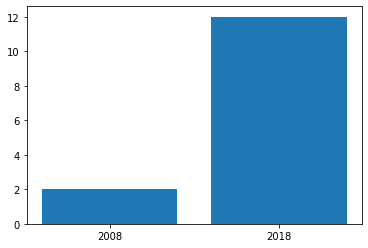

In [92]:

plt.bar(["2008", "2018"], [alt_08, alt_18])

In [97]:
m_08=df_08.model.nunique()
m_18=df_18.model.nunique()
m_08,m_18

(377, 348)

In [101]:
p_08=alt_08/m_08
p_18=alt_18/m_18
p_08,p_18

(0.005305039787798408, 0.034482758620689655)

<BarContainer object of 2 artists>

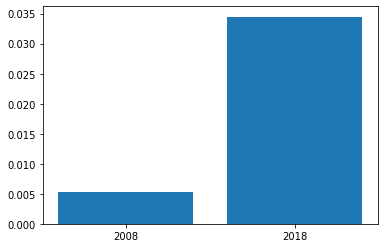

In [103]:
plt.bar(["2008", "2018"],[p_08,p_18])

In [114]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [116]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.381579
midsize car        26.643939
minivan            20.800000
pickup             19.171875
small SUV          23.870000
small car          24.032967
special purpose    18.500000
standard SUV       18.203125
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [117]:
dif=veh_18-veh_08

In [118]:
dif

veh_class
SUV                     NaN
large car          4.872488
midsize car        5.042490
minivan            1.682353
pickup             2.894767
small SUV               NaN
small car          2.927862
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [120]:
dif.dropna(inplace=True)
dif

veh_class
large car        4.872488
midsize car      5.042490
minivan          1.682353
pickup           2.894767
small car        2.927862
station wagon    5.162745
Name: cmb_mpg, dtype: float64

<BarContainer object of 6 artists>

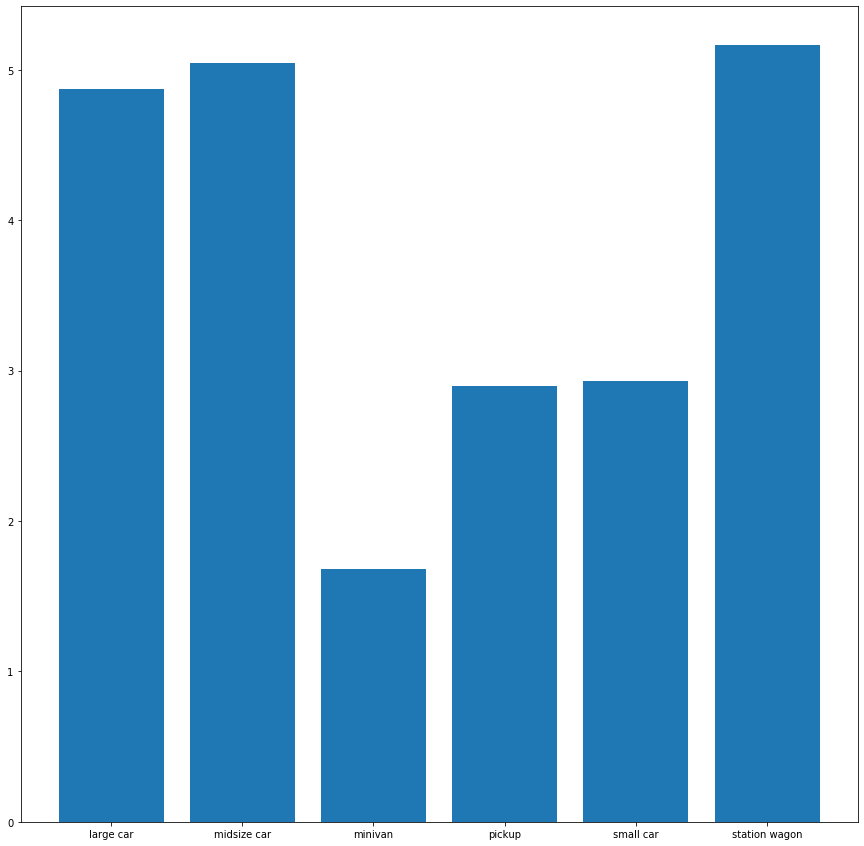

In [127]:
plt.subplots(figsize=(15,15))
plt.bar(dif.index,dif)

In [130]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [131]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite', 'no'], dtype=object)

In [134]:
s_08=df_08.query('smartway == "yes"')

In [136]:
s_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [139]:
s_18=df_18.query('smartway in ["Yes", "Elite"]')

In [144]:
s_18.smartway.value_counts()


Yes      83
Elite     3
Name: smartway, dtype: int64

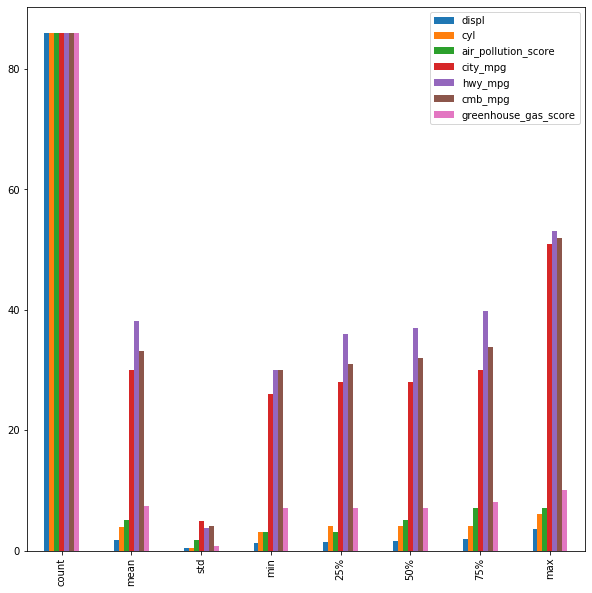

In [150]:
s_18.describe().plot(kind='bar',figsize=(10,10))

In [153]:
t_08=df_08.query('cmb_mpg').mean()

In [154]:
t_08

displ                    3.005370
cyl                      5.819656
air_pollution_score      6.211753
city_mpg                17.493414
hwy_mpg                 25.750760
cmb_mpg                 20.569402
greenhouse_gas_score     5.818642
dtype: float64

In [155]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [156]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,2.072113,4.183099,4.676056,24.845070,33.095775,27.943662,5.912676
std,0.496354,0.691144,1.869882,4.145135,4.093106,3.936241,1.055378
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,35.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,51.000000,53.000000,52.000000,10.000000


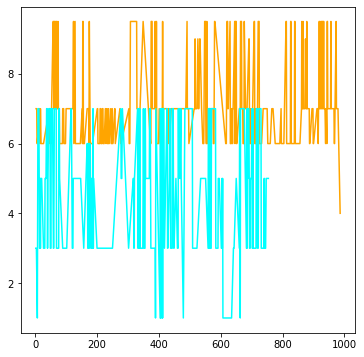

In [174]:
top_08.air_pollution_score.plot(kind='line',figsize=(6,6),color='orange')
top_18.air_pollution_score.plot(kind='line',color='cyan')

In [165]:
top_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 3 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 519 non-null    object 
 1   displ                 519 non-null    float64
 2   cyl                   519 non-null    int64  
 3   trans                 519 non-null    object 
 4   drive                 519 non-null    object 
 5   fuel                  519 non-null    object 
 6   veh_class             519 non-null    object 
 7   air_pollution_score   519 non-null    float64
 8   city_mpg              519 non-null    float64
 9   hwy_mpg               519 non-null    float64
 10  cmb_mpg               519 non-null    float64
 11  greenhouse_gas_score  519 non-null    int64  
 12  smartway              519 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 56.8+ KB


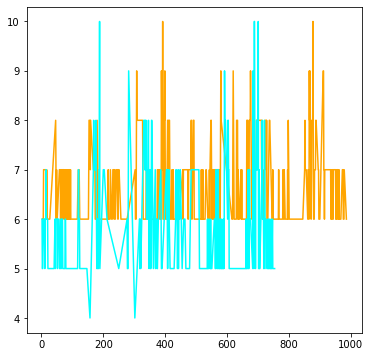

In [176]:
top_08.greenhouse_gas_score.plot(kind='line',figsize=(6,6),color='orange')
top_18.greenhouse_gas_score.plot(kind='line',color='cyan')

In [178]:
df_08.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


In [180]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 758 non-null    object 
 1   displ                 758 non-null    float64
 2   cyl                   758 non-null    int64  
 3   trans                 758 non-null    object 
 4   drive                 758 non-null    object 
 5   fuel                  758 non-null    object 
 6   veh_class             758 non-null    object 
 7   air_pollution_score   758 non-null    float64
 8   city_mpg              758 non-null    float64
 9   hwy_mpg               758 non-null    float64
 10  cmb_mpg               758 non-null    float64
 11  greenhouse_gas_score  758 non-null    int64  
 12  smartway              758 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 77.1+ KB


In [184]:
df_08.rename(columns=lambda x: x[:10] + "_2008",inplace=True)

In [185]:
df_08

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [187]:
df_c=df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [189]:
df_c

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,29.0,25.0,5,No
814,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No
815,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,24.0,33.0,27.0,6,No
816,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [190]:
df_combined.to_csv('combined_dataset.csv', index=False)